# outlier를 포함한 데이터의 표준화

표준정규분포로의 표준화 변환 시에는 "이상치, 특이값 (outlier)이 없어야 한다"는 가정사항이 있다.  표준정규분포로 변환하는 공식이 z = (x - mean) / std  이며, 평균(mean)은 이상치, 특이값에 엄청 민감하기 때문이다.

* 첫번째 방법은 "이상치, 특이값을 찾아서 제거"한 후 표준정규분포로 표준화 변환을 해서 분석, 모델링을 진행하는 방법
* 두번째 방법은 "이상치, 특이값에 덜 민감한" 중앙값(median)과 IQR(Inter-Quartile Range)을 이용해서 척도를 표준화하는 방법


In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
np.random.seed(10)
mu, sigma = 10, 2
x = mu + sigma*np.random.randn(100)
x

array([12.66317301, 11.43055795,  6.90919942,  9.9832323 , 11.24267195,
        8.55982888, 10.53102317, 10.21709705, 10.00858286,  9.65079958,
       10.86605238, 12.40607475,  8.06986866, 12.05654816, 10.45726026,
       10.89027523,  7.72679558, 10.27027376, 12.969074  ,  7.84039023,
        6.04454344,  6.51325541, 10.53214033, 14.76993466, 12.24738251,
       13.34524443, 10.19829843, 12.79599275,  9.45750402, 11.22640837,
        9.46536562,  8.90138197, 10.26541659,  9.04771597, 12.61694616,
       10.39002656, 10.80041998,  9.32473533, 12.51294453,  8.536061  ,
       11.3204631 ,  9.29825622,  8.12113328,  9.02132557,  8.39081772,
        9.57460472,  9.32171951, 10.62433987, 11.13030534,  9.70515948,
        9.94818933, 10.57818841,  8.92024186, 11.41632004, 11.68444948,
       10.40716159, 14.78940733, 11.83491788,  9.77545506,  9.27563911,
        9.53563549,  8.9965422 , 12.25757031,  8.60437994,  9.83775563,
        8.94140784, 12.09236571,  7.16288794,  9.27500163,  9.75

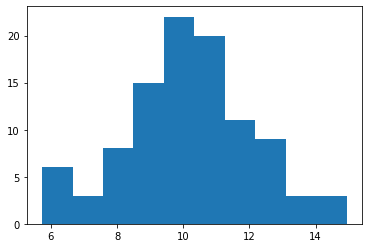

In [3]:
plt.hist(x)
plt.show()

In [4]:
# inserting outliers
x[98:100] = 100
x

array([ 12.66317301,  11.43055795,   6.90919942,   9.9832323 ,
        11.24267195,   8.55982888,  10.53102317,  10.21709705,
        10.00858286,   9.65079958,  10.86605238,  12.40607475,
         8.06986866,  12.05654816,  10.45726026,  10.89027523,
         7.72679558,  10.27027376,  12.969074  ,   7.84039023,
         6.04454344,   6.51325541,  10.53214033,  14.76993466,
        12.24738251,  13.34524443,  10.19829843,  12.79599275,
         9.45750402,  11.22640837,   9.46536562,   8.90138197,
        10.26541659,   9.04771597,  12.61694616,  10.39002656,
        10.80041998,   9.32473533,  12.51294453,   8.536061  ,
        11.3204631 ,   9.29825622,   8.12113328,   9.02132557,
         8.39081772,   9.57460472,   9.32171951,  10.62433987,
        11.13030534,   9.70515948,   9.94818933,  10.57818841,
         8.92024186,  11.41632004,  11.68444948,  10.40716159,
        14.78940733,  11.83491788,   9.77545506,   9.27563911,
         9.53563549,   8.9965422 ,  12.25757031,   8.60

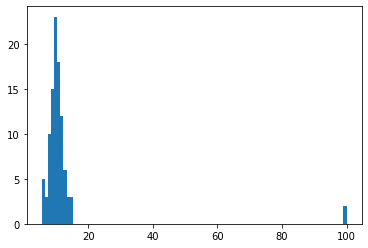

In [5]:
plt.hist(x, bins=100)
plt.show()

### 이상치가 포함된 데이터의 표준정규분포로의 표준화 :  sklearn.preprocessing.StandardScaler()


In [6]:
x = x.reshape(-1, 1)
x_StandardScaler = StandardScaler().fit_transform(x)
x_StandardScaler[-5:]

array([[-0.01139209],
       [-0.23166917],
       [-0.14174375],
       [ 6.92266724],
       [ 6.92266724]])

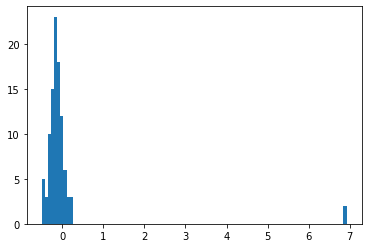

In [7]:
plt.hist(x_StandardScaler, bins=100)
plt.show()

이상치(outlier)를 무시하고 표준화 이후 값 범위 (-3 ~ 3) 사이로 그린 히스토그램


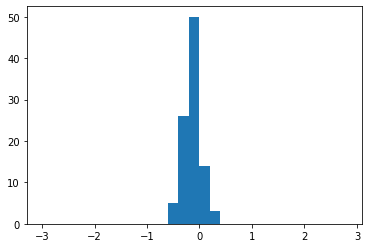

In [8]:
x_StandardScaler_zoomin = x_StandardScaler[x_StandardScaler < 5]
plt.hist(x_StandardScaler_zoomin, bins=np.arange(-3.0, 3.0, 0.2))
plt.show()

### 이상치가 포함된 데이터의 중앙값과 IQR 를 이용한 표준화: sklearn.preprocessing.RobustScaler()


In [9]:
x_RobustScaler = RobustScaler().fit_transform(x)

In [10]:
x_RobustScaler[-10:]

array([[ 8.45896938e-01],
       [ 1.18556008e-01],
       [-1.39677571e-01],
       [-7.22771749e-01],
       [ 5.12420891e-01],
       [ 6.86267067e-01],
       [-4.93741025e-01],
       [-1.20171760e-02],
       [ 3.78315112e+01],
       [ 3.78315112e+01]])

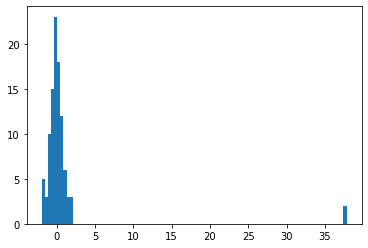

In [11]:
plt.hist(x_RobustScaler, bins=100)
plt.show()

이상치(outlier)를 무시하고 표준화 이후 값 범위 (-3 ~ 3) 사이로 그린 히스토그램


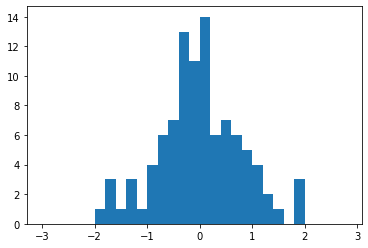

In [12]:
x_RobustScaler_zoomin = x_RobustScaler[x_RobustScaler < 5]
plt.hist(x_RobustScaler_zoomin, bins=np.arange(-3, 3, 0.2))
plt.show()

### 결론
* RobustScaler()에 의한 표준화가 outlier의 영향을 덜 받는다.
* StandardScaler()에 의한 표준화보다 RobustScaler()에 의한 표준화가 동일한 값을 더 넓게 분포시키고 있음을 알 수 있다.

In [13]:
import sklearn
sklearn.__version__

'0.24.2'